In [1]:
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

%load_ext autoreload

In [2]:
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history
from rotation_rate_utils import plot_parameter_distances

/home/sicarbonnell/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
with open('results/lr_gridsearch.p','rb') as f:
    results = pickle.load(f)

In [12]:
matplotlib.rcParams.update({'font.size': 17})
def make_plot(task, results, optimizer = 'SGD'):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    lrs = sorted(results[task][optimizer].keys(), reverse=True)
    lrs_log = [m.log(lr,3) for lr in lrs]
    
    if task == 'tinyImagenet':
        val_accs = [max(results[task][optimizer][lr]['history']['history']['val_acc']) for lr in lrs] # early stopping
    else:
        val_accs = [results[task][optimizer][lr]['history']['history']['val_acc'][-1] for lr in lrs]
    train_accs = [results[task][optimizer][lr]['history']['history']['acc'][-1] for lr in lrs]

    plt.plot(lrs_log,val_accs,'C0--')
    plt.plot(lrs_log,val_accs,'C0.', ms =15, label = 'validation')
    plt.plot(lrs_log,train_accs,'C1--')
    plt.plot(lrs_log,train_accs,'C1.', ms =15, label = 'train')
    plt.xlabel('Learning rate')
    plt.ylabel('accuracy')
    plt.legend()
    plt.tight_layout()
    plt.xticks(sorted(lrs_log),[r'$3^{-7}$',r'$3^{-6}$',r'$3^{-5}$',r'$3^{-4}$',r'$3^{-3}$',r'$3^{-2}$',r'$3^{-1}$',r'$3^{0}$',r'$3^{1}$',r'$3^{2}$'])
    plt.title(task)

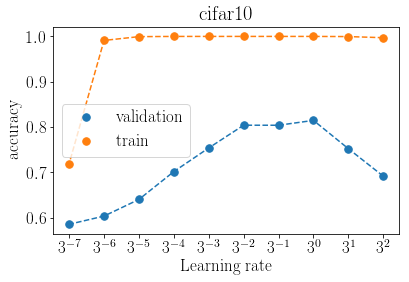

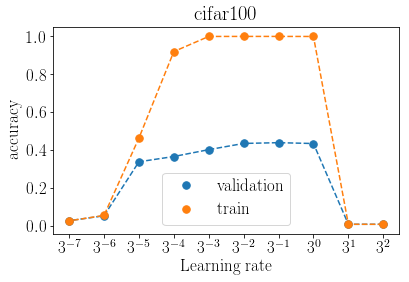

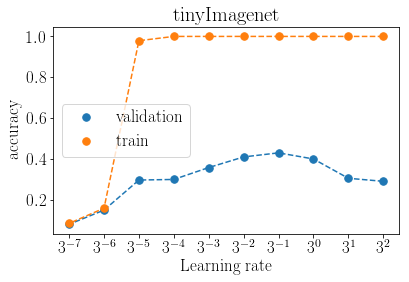

In [14]:
for task in ['cifar10','cifar100','tinyImagenet']:
    plt.figure()
    make_plot(task, results)
    plt.savefig('figures/gridsearch_'+task+'.eps',format='eps', dpi=200)